# Exploring US Flight Data 

Faros Antonios  
Department of Management Science and Technology  
8160139  
antonis.faros@gmail.com

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Question 1
Provide a "misery index" for airports. That is, sort the airports in descending order of the probability that a flight departing from that airport has a delay. Take care of outliers: some airports may have a preposterously low number of flights. We are not interested in them. Your criterion for outliers will be the airports in the lowest 1% percentile in the number of flights.

After you have done that, go around your data again, but this time you will show the average and median delay for each airport. You may sort the results by either.

Finally, enrich your airport misery index by tabulating both the probability, in descending order, that you will experience a delay at a given airport, and the average and median delay that you are likely to experience.


### Dataset Import
The  file is read from the same directory as the notebook runs. 
We read the columns DEP_TIME and ARR_TIME as strings in order to be presented without '.0'   
Moreover the column FL_DATE is read as datetime for any use.

In [49]:
data_filename = 'flights.csv'
dtype_dict = {'DEP_TIME':str,'ARR_TIME':str}
data = pd.read_csv(data_filename, parse_dates=['FL_DATE'],dtype = dtype_dict)
                     




We will clear all cancelled flights as we assume they will not interfere with the final results.  
We will also clear any Unnamed column

In [50]:
df = data
df=df[df.CANCELLED != 1]
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df

C:\Users\tfaro\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,FL_DATE,TAIL_NUM,CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2018-01-01,N8891A,9E,GFK,"Grand Forks, ND",MSP,"Minneapolis, MN",1302,-8.0,1417,-12.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,N8891A,9E,MSP,"Minneapolis, MN",GFK,"Grand Forks, ND",1124,9.0,1234,-11.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,N293PQ,9E,DTW,"Detroit, MI",SAT,"San Antonio, TX",2022,4.0,2232,-50.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,N295PQ,9E,BOS,"Boston, MA",CVG,"Cincinnati, OH",1349,104.0,1613,94.0,0.0,NaN,0.0,79.0,0.0,0.0,0.0,15.0
4,2018-01-01,N605LR,9E,MSP,"Minneapolis, MN",CLT,"Charlotte, NC",0846,1.0,1214,-14.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
5,2018-01-01,N349PQ,9E,SYR,"Syracuse, NY",JFK,"New York, NY",1820,5.0,1923,-32.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
6,2018-01-01,N935XJ,9E,GSP,"Greer, SC",LGA,"New York, NY",0656,-4.0,0829,-29.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
7,2018-01-01,N922XJ,9E,FSD,"Sioux Falls, SD",ATL,"Atlanta, GA",1011,241.0,1331,221.0,0.0,NaN,0.0,221.0,0.0,0.0,0.0,0.0
8,2018-01-01,N279PQ,9E,DTW,"Detroit, MI",IND,"Indianapolis, IN",1210,-5.0,1312,-27.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
9,2018-01-01,N137EV,9E,CVG,"Cincinnati, OH",MSP,"Minneapolis, MN",1052,-8.0,1149,-21.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


We group the dataframe by the column ORIGIN in order to be able to gather the combined statistics for every airport.  
We assume that every origin matches one and only one specific airport .  


In [51]:
grouped = df.groupby('ORIGIN')

We create a new dataframe in order to use the total number of flights departed from each airport

In [52]:
df1 = grouped.size().to_frame()

In [53]:
df1.columns = ['No_Of_Flights']

We set the limit equal to the 1% quantile in order to ignore the airports with flughts under that limit

In [54]:
limit=df1.No_Of_Flights.quantile(0.01)

In [55]:
tbd = df1.loc[df1.No_Of_Flights <limit].reset_index()

In [56]:
df_clean = df

We create a clean datset without the outliers as asked.

In [57]:
df_clean = pd.merge(df_clean, tbd, how='outer', indicator=True)
df_clean = df_clean.loc[df_clean._merge == 'left_only']
airports_grouped = df_clean.groupby('ORIGIN')

For the values of mean and median delays we both take into account the positive and negative delays.

In [58]:
mean_delay=airports_grouped.DEP_DELAY.agg('mean')

In [59]:
median_delay=airports_grouped.median().DEP_DELAY
airports_stats = pd.merge(mean_delay, median_delay,on="ORIGIN" ,how='outer')
airports_stats.rename(columns={"DEP_DELAY_x": "MEAN DELAY", "DEP_DELAY_y": "MEDIAN DELAY"},inplace=True)
airports_stats.sort_values('MEAN DELAY',axis=0,ascending=False,inplace=True)
airports_stats

,MEAN DELAY,MEDIAN DELAY
ORIGIN,,
PPG,45.385246,0.0
HYA,34.397727,3.5
MMH,33.503704,-1.0
OTH,28.635854,-2.0
OWB,27.635514,3.0
HGR,26.760870,0.0
LWB,25.709220,-5.0
TTN,25.308151,0.0
SCK,24.265857,8.0


We gather all the columns in one dataframe : airports_stats  
We assume that the mean and median delay about to be experienced in each airport can be identified **only by the positive delays experienced in that specific airport during departure and multiplied by the overall probability to experience a delay in the specific airport.**   
**We will also note that a delayed flight is considered to be a flight with any minute delay**

In [60]:
delayed_flights=df_clean.loc[df_clean.DEP_DELAY >0].groupby('ORIGIN')
mean_delay_on_delayed=delayed_flights.DEP_DELAY.agg('mean')
median_delay_on_delayed=delayed_flights.median().DEP_DELAY
delayed =df_clean.loc[df_clean.DEP_DELAY >0].groupby('ORIGIN').DEP_DELAY.count()
total_flights = grouped.size()


airports_stats['PROBABILITY OF DELAY %']=round(delayed/total_flights*100,2)
airports_stats.sort_values('PROBABILITY OF DELAY %',axis= 0,ascending=False,inplace=True)
airports_stats['MEAN DELAY ABOUT TO EXPERIENCE']= round(mean_delay_on_delayed*airports_stats['PROBABILITY OF DELAY %']/100,2)
airports_stats['MEDIAN DELAY ABOUT TO EXPERIENCE']= round(median_delay_on_delayed*airports_stats['PROBABILITY OF DELAY %']/100,2)
airports_stats 


,MEAN DELAY,MEDIAN DELAY,PROBABILITY OF DELAY %,MEAN DELAY ABOUT TO EXPERIENCE,MEDIAN DELAY ABOUT TO EXPERIENCE
ORIGIN,,,,,
OGD,19.064000,5.0,66.40,20.52,9.30
SCK,24.265857,8.0,65.59,25.52,13.77
MDW,14.815551,4.0,60.09,15.99,8.41
HYA,34.397727,3.5,59.09,36.20,8.86
DAL,14.242849,3.0,57.91,15.53,7.53
HOU,12.937240,2.0,55.18,14.26,7.17
OWB,27.635514,3.0,52.34,31.04,13.08
HTS,18.103203,1.0,50.18,20.77,9.53
HGR,26.760870,0.0,49.28,28.66,13.06


## Question 2
Provide a "misery index" for airlines. That is, do the same thing you did for the airports, but this time we are interested in the airlines that make life difficult for passengers. Sort the airlines in descending order of probability that a flight operated by the airline has a delay. This time we do not care about outliers.

Then, go around your data again, but this time the criterion will be the average and median delay you may expect to have with an airline. Again we do not care about outliers.

And finally, as you would expect, enrich your airline misery index by tabulating both the probability, in descending order, that you will experience a delay flying with a particular airline, and the average and median delay that you are likely to experience.

Note that because in the 2018 performance data airlines are only indicated by their code, you should also download the carrier lookup table from https://www.transtats.bts.gov/Download_Lookup.asp?Lookup=L_UNIQUE_CARRIERS, so that you can include airline names in your results.

### Mapping
In order to replace the encoding used by the specific data source we need to create a dictionary and replace the carrier code with the actual carrier name. We assume that the file L_UNIQUE_CARRIERS is saved into the current directory and it is a csv file.

In [61]:
carriers = pd.read_csv('L_UNIQUE_CARRIERS.csv')
airline_mapping = pd.Series(carriers.Description.values,index=carriers.Code).to_dict()
f = lambda x: airline_mapping.get(x, x) 
df.loc[:, 'CARRIER'] = df.loc[:, 'CARRIER'].map(f)
df

C:\Users\tfaro\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,FL_DATE,TAIL_NUM,CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2018-01-01,N8891A,Endeavor Air Inc.,GFK,"Grand Forks, ND",MSP,"Minneapolis, MN",1302,-8.0,1417,-12.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,N8891A,Endeavor Air Inc.,MSP,"Minneapolis, MN",GFK,"Grand Forks, ND",1124,9.0,1234,-11.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,N293PQ,Endeavor Air Inc.,DTW,"Detroit, MI",SAT,"San Antonio, TX",2022,4.0,2232,-50.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,N295PQ,Endeavor Air Inc.,BOS,"Boston, MA",CVG,"Cincinnati, OH",1349,104.0,1613,94.0,0.0,NaN,0.0,79.0,0.0,0.0,0.0,15.0
4,2018-01-01,N605LR,Endeavor Air Inc.,MSP,"Minneapolis, MN",CLT,"Charlotte, NC",0846,1.0,1214,-14.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
5,2018-01-01,N349PQ,Endeavor Air Inc.,SYR,"Syracuse, NY",JFK,"New York, NY",1820,5.0,1923,-32.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
6,2018-01-01,N935XJ,Endeavor Air Inc.,GSP,"Greer, SC",LGA,"New York, NY",0656,-4.0,0829,-29.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
7,2018-01-01,N922XJ,Endeavor Air Inc.,FSD,"Sioux Falls, SD",ATL,"Atlanta, GA",1011,241.0,1331,221.0,0.0,NaN,0.0,221.0,0.0,0.0,0.0,0.0
8,2018-01-01,N279PQ,Endeavor Air Inc.,DTW,"Detroit, MI",IND,"Indianapolis, IN",1210,-5.0,1312,-27.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
9,2018-01-01,N137EV,Endeavor Air Inc.,CVG,"Cincinnati, OH",MSP,"Minneapolis, MN",1052,-8.0,1149,-21.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


We take into account the total delay of the flight and not only the column referring to carrier delays as most of the flights have no specified reason for delay.

In [62]:
flights = df
carrier_flights = flights.groupby('CARRIER')
total_flights_by_carrier=carrier_flights.size()
delayed_flights_by_carrier=df.loc[(df.DEP_DELAY >0)|(df.ARR_DELAY>0)].groupby('CARRIER')
delayed_carriers=delayed_flights_by_carrier.size()
carrier_stats= pd.DataFrame()
carrier_stats['Total Flights per Carrier']= total_flights_by_carrier
carrier_stats['Delayed Flights per Carrier'] = delayed_carriers
carrier_stats['Probability of Delay %']=round (delayed_carriers/total_flights_by_carrier*100,3)
carrier_stats.sort_values('Probability of Delay %',axis=0,ascending=False,inplace=True)
carrier_stats

,Total Flights per Carrier,Delayed Flights per Carrier,Probability of Delay %
CARRIER,,,
Southwest Airlines Co.,1334277,739604,55.431
Frontier Airlines Inc.,117707,64114,54.469
JetBlue Airways,298591,153137,51.287
PSA Airlines Inc.,266587,129802,48.690
American Airlines Inc.,901873,422401,46.836
Virgin America,17237,7741,44.909
Allegiant Air,95452,42272,44.286
Mesa Airlines Inc.,209608,89024,42.472
Envoy Air,285346,121015,42.410


We take into account both the departure and arrival delays for the mean and median  
so we create the average of those and tabulate that.

In [63]:
mean_dep_delay_by_carrier=carrier_flights.DEP_DELAY.mean()
mean_arr_delay_by_carrier=carrier_flights.ARR_DELAY.mean()
avg_carrier_delay = (mean_dep_delay_by_carrier+mean_arr_delay_by_carrier)/2
median_dep_delay_by_carrier=carrier_flights.median().DEP_DELAY
median_arr_delay_by_carrier=carrier_flights.median().ARR_DELAY
avg_median_carrier_delay =(median_dep_delay_by_carrier+median_arr_delay_by_carrier)/2
carrier_delay_stats =pd.DataFrame()
carrier_delay_stats['Median Delay'] = avg_median_carrier_delay
carrier_delay_stats['Mean Delay'] = avg_carrier_delay
carrier_delay_stats.sort_values('Mean Delay',axis=0,ascending=False,inplace=True)
carrier_delay_stats


,Median Delay,Mean Delay
CARRIER,,
Frontier Airlines Inc.,-2.0,16.938801
JetBlue Airways,-3.0,13.633990
Allegiant Air,-3.0,11.453635
ExpressJet Airlines LLC,-5.5,10.545130
PSA Airlines Inc.,-2.5,10.104712
Mesa Airlines Inc.,-3.5,10.023159
SkyWest Airlines Inc.,-5.0,8.560779
United Air Lines Inc.,-4.5,7.898488
Southwest Airlines Co.,-2.0,7.826232


We assume that the mean and median delay about to be experienced should be calculated by   
also taking into account the probability of a delay occured.  
We also take into account both the deparure and the arrival delay.

In [64]:
mean_dep_delay_on_delayed=delayed_flights_by_carrier.DEP_DELAY.agg('mean')
mean_arr_delay_on_delayed=delayed_flights_by_carrier.ARR_DELAY.agg('mean')
median_dep_delay_on_delayed=delayed_flights_by_carrier.median().DEP_DELAY
median_arr_delay_on_delayed=delayed_flights_by_carrier.median().ARR_DELAY
avg_mean =(mean_dep_delay_on_delayed+mean_arr_delay_on_delayed)/2
avg_median =(median_dep_delay_on_delayed+median_arr_delay_on_delayed)/2
carrier_delay_stats['Probability of Delay %']= round (delayed_carriers/total_flights_by_carrier*100,3)
carrier_delay_stats['Mean Delay about to Experience'] = round(avg_mean *carrier_delay_stats['Probability of Delay %']/100,2)
carrier_delay_stats['Median Delay about to Experience'] = round(avg_median*carrier_delay_stats['Probability of Delay %']/100,2)
carrier_delay_stats

,Median Delay,Mean Delay,Probability of Delay %,Mean Delay about to Experience,Median Delay about to Experience
CARRIER,,,,,
Frontier Airlines Inc.,-2.0,16.938801,54.469,22.03,9.26
JetBlue Airways,-3.0,13.633990,51.287,19.11,8.46
Allegiant Air,-3.0,11.453635,44.286,16.98,6.42
ExpressJet Airlines LLC,-5.5,10.545130,38.934,16.97,5.65
PSA Airlines Inc.,-2.5,10.104712,48.690,14.57,5.11
Mesa Airlines Inc.,-3.5,10.023159,42.472,14.97,4.46
SkyWest Airlines Inc.,-5.0,8.560779,39.708,14.56,4.17
United Air Lines Inc.,-4.5,7.898488,42.206,13.49,4.22
Southwest Airlines Co.,-2.0,7.826232,55.431,11.16,4.71


## Question 3
Create a histogram that shows the distribution of departures for airports. That is, the x-axis will be bins containing flights and the y-axis will be the number of airports with departing flights in each particular bin

In [65]:
bins = np.logspace(0, 6, num=7)
bins = np.insert(bins, 0, 0)


In [66]:
flights_by_airport =df1
flights_by_airport=flights_by_airport.reset_index()

bin_labels = pd.cut(flights_by_airport['No_Of_Flights'], bins)
bin_labels
grouped = flights_by_airport.groupby(['ORIGIN',bin_labels])
totals = grouped.size().unstack(0).fillna(0).sum(axis=1)


In [67]:
totals = totals.to_frame()

In [68]:
totals.columns = ['Airports with this number of Flights']
totals= totals.reset_index()
totals.sort_values('No_Of_Flights',axis=0,ascending=True,inplace=True)

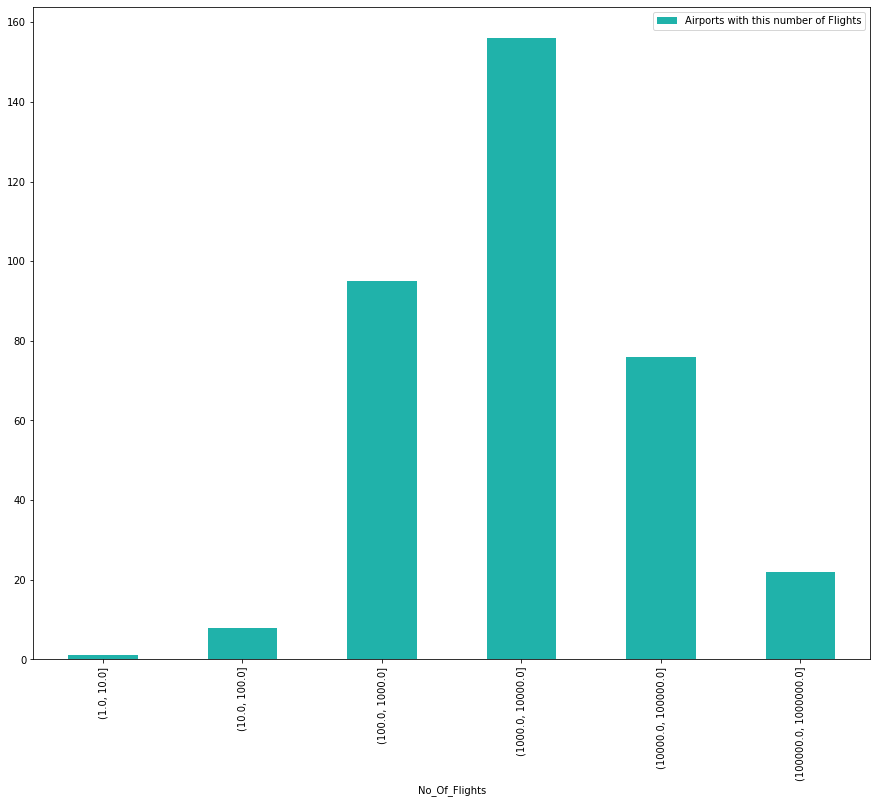

In [69]:
ax =totals.plot(x ='No_Of_Flights', y='Airports with this number of Flights', kind = 'bar',figsize=[15,12],color ='lightseagreen')


## Question 4


We are interested in the temporal distribution of delays, so create a plot that shows the number of flights and the number of delayed flights per month of year.  
**We assume that a delayed flight is whether a flight is delayed to depart or to arrive**


In [70]:
monthly_flights =df.groupby(df['FL_DATE'].dt.strftime('%B'))

In [71]:
monthly_delayed_flights=df.loc[(df.DEP_DELAY > 0) |df.ARR_DELAY > 0].groupby(df['FL_DATE'].dt.strftime('%B'))

In [72]:
month_stats =pd.DataFrame()
month_stats['Monthly Flights'] = monthly_flights.size()
month_stats['Monthly Delayed Flights'] = monthly_delayed_flights.size()
month_stats

,Monthly Flights,Monthly Delayed Flights
FL_DATE,,
April,589795,581285
August,632320,623339
December,587090,579159
February,511755,505209
January,552949,546192
July,634216,625207
June,615499,606784
March,594707,586374
May,609374,600671


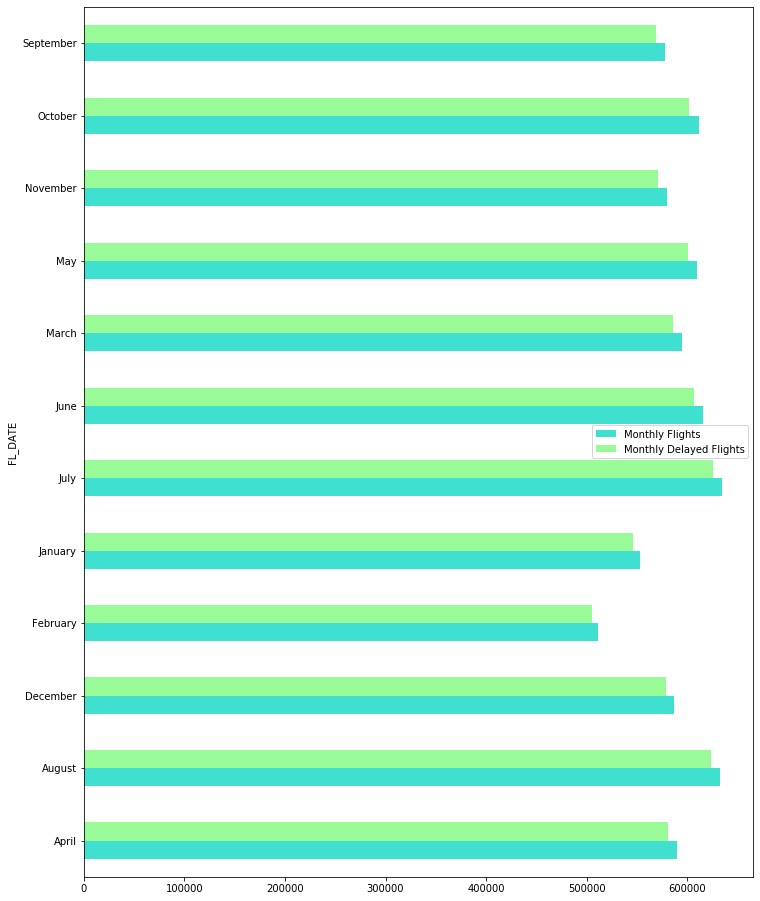

In [73]:
month_stats.plot(kind='barh', color=('turquoise', 'palegreen'), figsize=(12, 16))

## Question 5

Provide a table that shows, for each possible origin and destination, which airline has the best performance, in terms of mean departure delay. With this table at hand, show how you can determine the best airline for a particular pair of origin and destination airports.



In [74]:
flights = df
hierarchical_flights = flights.set_index(['ORIGIN', 'DEST','CARRIER'])

hierarchical_flights = hierarchical_flights.sort_index(level=['ORIGIN', 
                                                              'DEST','CARRIER'])



In [75]:
temp = hierarchical_flights.groupby(['ORIGIN','DEST','CARRIER'])


In [76]:
mean_delay = temp.DEP_DELAY.mean().to_frame()
mean_delay.rename(columns={"DEP_DELAY": "MEAN DELAY"},inplace=True)
mean_delay

MEAN DELAY
ORIGIN DEST CARRIER                            
ABE    ATL  Delta Air Lines Inc.       7.530387
            Endeavor Air Inc.         11.991379
            ExpressJet Airlines LLC   10.433735
       CLT  PSA Airlines Inc.          5.063527
       DTW  SkyWest Airlines Inc.     15.946507
       FLL  Allegiant Air             40.708333
       MDT  SkyWest Airlines Inc.    175.000000
       MYR  Allegiant Air              7.892857
       ORD  ExpressJet Airlines LLC   13.338164
            SkyWest Airlines Inc.     12.907801
       PGD  Allegiant Air             16.277778
       PHL  PSA Airlines Inc.          8.275000
       PIE  Allegiant Air             13.050633
       SFB  Allegiant Air             15.493213
ABI    DFW  Envoy Air                  8.027259
ABQ    ATL  Delta Air Lines Inc.       3.684706
       AUS  Allegiant Air             21.931624
            Frontier Airlines Inc.    10.912500
            Southwest Airlines Co.    15.702128
       BWI  Southwest Airlines Co.    10.849817
       DAL  Southwest Airlines Co.    10.105861
       DEN  Frontier Airlines Inc.    24.560311
            Republic Airline           4.708955
            SkyWest Airlines Inc.      2.727975
            Southwest Airlines Co.    10.717476
            United Air Lines Inc.      4.809038
       DFW  American Airlines Inc.     9.131094
            Mesa Airlines Inc.         4.092832
       HOU  Southwest Airlines Co.     8.362669
       IAH  ExpressJet Airlines LLC   11.741935
...                                         ...
XNA    EWR  ExpressJet Airlines LLC   -4.250000
            Republic Airline          44.274247
       IAH  ExpressJet Airlines LLC    8.281806
            Mesa Airlines Inc.         9.381166
            Republic Airline          11.809677
            SkyWest Airlines Inc.      1.833333
       LAS  Allegiant Air             22.735849
       LAX  Allegiant Air              9.900000
       LGA  Endeavor Air Inc.         37.190789
            ExpressJet Airlines LLC   28.548673
            Republic Airline           6.690972
       MSP  Delta Air Lines Inc.      31.500000
            Endeavor Air Inc.         14.364162
            ExpressJet Airlines LLC   20.753425
            SkyWest Airlines Inc.      4.863014
       ORD  American Airlines Inc.     2.333333
            Envoy Air                  7.706571
            ExpressJet Airlines LLC    9.671875
            PSA Airlines Inc.          9.725000
            Republic Airline          19.132530
            SkyWest Airlines Inc.     28.815068
       SFB  Allegiant Air             27.985401
       SFO  SkyWest Airlines Inc.      3.257880
       TXK  ExpressJet Airlines LLC   38.000000
       VPS  Allegiant Air             11.733333
YAK    CDV  Alaska Airlines Inc.      -4.081921
       JNU  Alaska Airlines Inc.     -13.307263
YNG    PIE  Allegiant Air            111.000000
       SFB  Allegiant Air             15.000000
YUM    PHX  SkyWest Airlines Inc.     -0.455669

[13046 rows x 1 columns]

We need to identify the carrier with the least mean delay from the table above.

In [77]:
results = pd.DataFrame()
for origin, new_df in mean_delay.groupby(level=[0,1]):
        min_index = new_df.idxmin()
        min_value = new_df.min()
        results = results.append(min_index,ignore_index = True)

In [78]:
final_results =pd.DataFrame(results['MEAN DELAY'].tolist(),columns =['ORIGIN','DEST',' BEST CARRIER'])
final_results 

,ORIGIN,DEST,BEST CARRIER
0,ABE,ATL,Delta Air Lines Inc.
1,ABE,CLT,PSA Airlines Inc.
2,ABE,DTW,SkyWest Airlines Inc.
3,ABE,FLL,Allegiant Air
4,ABE,MDT,SkyWest Airlines Inc.
5,ABE,MYR,Allegiant Air
6,ABE,ORD,SkyWest Airlines Inc.
7,ABE,PGD,Allegiant Air
8,ABE,PHL,PSA Airlines Inc.
9,ABE,PIE,Allegiant Air


We create a function which takes as arguments two airports (ex.'YAK' for Yakutat Airport,  'JNU' for Juneau International Airport ) and returns the best airline connecting those airports, if a connection exists.

In [79]:
def find_best_carrier(origin,dest):
    carrier = 'There is not a connection between the Origin and Destination you inserted'
    for row in final_results.values:
        if (row[0] == origin):
            if (row[1] == dest):
                carrier = row[2]
                return carrier
    return carrier

print(find_best_carrier('YAK','JNU'))
       
        
        
        

Alaska Airlines Inc.
